In [5]:
import json
import numpy as np
import pandas as pd

import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


import preprocessor as p # 
import string # use string.punctuation to clean out punctuation

from pprint import pprint

from datetime import datetime
import pickle



from tqdm import tqdm

pd.set_option('display.max_colwidth', -1)

In [6]:
with open("clean_tweets.pkl", 'rb') as picklefile: 
    tweetsDF = pickle.load(picklefile)

## Preprocessing

In [7]:
cleanDF = pd.DataFrame(columns = ['id','full_text'])

In [8]:
cleanDF['full_text'] = tweetsDF['full_text']

In [9]:
cleanDF.drop('id',axis = 1).head()

,full_text
0,population control will not reverse or mitigate climate change here is the logic and evidence PopulationControlLaw
1,I see climate change deniers are out in force today due to the cold weather in Europe. They still haven't bothered to research the issue properly and are still hung up on the 'global warming' meaning. ClimateChangeIsReal
2,"Convenient truth, Al Gore, the father of global warming suggest that we tax Ranchers cows passing gas! He owns Mansion , flies around in his personal jet and leaves a carbon footprint like a herd of elephants. Now the Dems switch the name climate change, what a hoax!"
3,"And yes, it’s consistent with climate change. Warming at the poles weakens the jetstream, which blows warm air from the west, and allows colder air in from the east."
4,CAN LEE S L DO SOMETHING TO SAFE THE GLOBAL WARMING AND CLIMATE CHANGES ?


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['climate', 'change', 'global', 'warming', 'climatechange', 'globalwarming']

## Count Vectorizer

In [11]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(ngram_range=(1, 2), #max_df = 0.8,  
                                   stop_words=stop, token_pattern="\\b[a-z][a-z]+\\b")
count_vectorizer.fit(cleanDF.full_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',...", 'wouldn', "wouldn't", 'climate', 'change', 'global', 'warming', 'climatechange', 'globalwarming'],
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
# Create the term-document matrix
# Transpose it so the terms are the rows
counts = count_vectorizer.transform(cleanDF.full_text).transpose()

In [13]:
counts.shape

(50897, 17579)

In [31]:
cleanDF.full_text[1]

"I see climate change deniers are out in force today due to the cold weather in Europe. They still haven't bothered to research the issue properly and are still hung up on the 'global warming' meaning. ClimateChangeIsReal"

In [30]:
print(counts[1])

  (0, 4891)	2


In [14]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(counts)

In [15]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [16]:
len(id2word)

50897

In [17]:
id2word[2]

'ab need'

## LDA Topic Modelling

In [18]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=3, id2word=id2word, passes=10, minimum_probability = 0.03)

2018-03-03 15:59:49,325 : INFO : using symmetric alpha at 0.3333333333333333
2018-03-03 15:59:49,334 : INFO : using symmetric eta at 0.3333333333333333
2018-03-03 15:59:49,344 : INFO : using serial LDA version on this node
2018-03-03 15:59:50,155 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 17579 documents, updating model once every 2000 documents, evaluating perplexity every 17579 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-03 15:59:50,170 : INFO : PROGRESS: pass 0, at document #2000/17579
2018-03-03 15:59:53,863 : INFO : merging changes from 2000 documents into a model of 17579 documents
2018-03-03 15:59:53,916 : INFO : topic #0 (0.333): 0.006*"term" + 0.005*"weather" + 0.004*"arctic" + 0.004*"know" + 0.003*"scientists" + 0.003*"thought" + 0.003*"cold" + 0.003*"right" + 0.003*"science" + 0.002*"use"
2018-03-03 15:59:53,918 : INFO : topic #1 (0.333): 0.023*"india" + 0.023*"million trees" + 0.022*"hours

In [19]:
lda.print_topics()

2018-03-03 16:02:25,927 : INFO : topic #0 (0.333): 0.005*"new" + 0.005*"year" + 0.005*"china" + 0.005*"pollution" + 0.005*"plant" + 0.004*"trees" + 0.004*"arctic" + 0.004*"plant trees" + 0.004*"soldiers" + 0.004*"soldiers plant"
2018-03-03 16:02:25,929 : INFO : topic #1 (0.333): 0.007*"world" + 0.005*"science" + 0.005*"lakes" + 0.005*"extreme" + 0.004*"biggest" + 0.004*"world biggest" + 0.004*"biggest lakes" + 0.004*"degrees" + 0.004*"drying" + 0.004*"lakes drying"
2018-03-03 16:02:25,932 : INFO : topic #2 (0.333): 0.009*"changed" + 0.008*"six" + 0.008*"americans" + 0.007*"minds" + 0.007*"changed minds" + 0.007*"americans changed" + 0.007*"six americans" + 0.005*"air" + 0.005*"many" + 0.005*"means"


[(0,
  '0.005*"new" + 0.005*"year" + 0.005*"china" + 0.005*"pollution" + 0.005*"plant" + 0.004*"trees" + 0.004*"arctic" + 0.004*"plant trees" + 0.004*"soldiers" + 0.004*"soldiers plant"'),
 (1,
  '0.007*"world" + 0.005*"science" + 0.005*"lakes" + 0.005*"extreme" + 0.004*"biggest" + 0.004*"world biggest" + 0.004*"biggest lakes" + 0.004*"degrees" + 0.004*"drying" + 0.004*"lakes drying"'),
 (2,
  '0.009*"changed" + 0.008*"six" + 0.008*"americans" + 0.007*"minds" + 0.007*"changed minds" + 0.007*"americans changed" + 0.007*"six americans" + 0.005*"air" + 0.005*"many" + 0.005*"means"')]

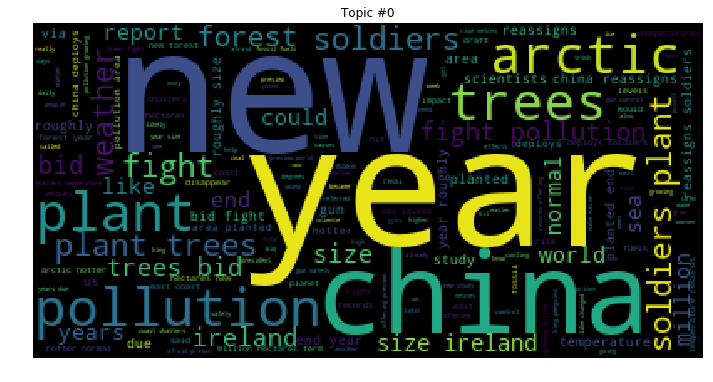

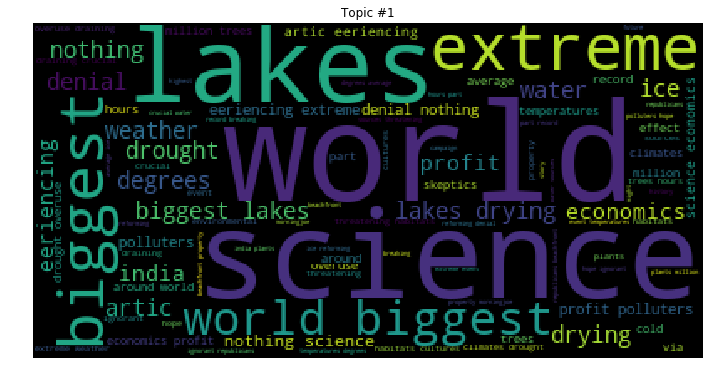

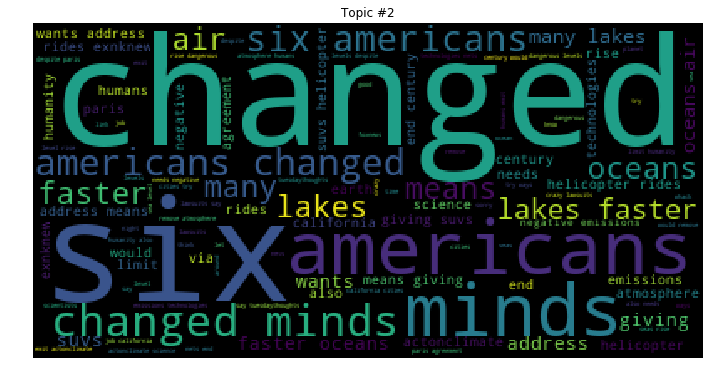

In [20]:
for t in range(lda.num_topics):
    plt.figure(figsize = (12,16))
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t,200))))
    plt.axis('off')
    plt.title('Topic #' + str(t))
    plt.show();

In [21]:
lda.show_topic(t,200)

[('changed', 0.009102256),
 ('six', 0.0079689585),
 ('americans', 0.007745795),
 ('minds', 0.007431449),
 ('changed minds', 0.00737387),
 ('americans changed', 0.0073720287),
 ('six americans', 0.0073115025),
 ('air', 0.005288284),
 ('many', 0.0052572726),
 ('means', 0.0052506663),
 ('lakes', 0.005031425),
 ('oceans', 0.005025324),
 ('faster', 0.004956637),
 ('lakes faster', 0.0047018444),
 ('many lakes', 0.0046996293),
 ('oceans air', 0.00469104),
 ('faster oceans', 0.00469104),
 ('wants', 0.0046308073),
 ('address', 0.004611289),
 ('giving', 0.004575223),
 ('suvs', 0.004510608),
 ('helicopter rides', 0.004510608),
 ('giving suvs', 0.004510608),
 ('helicopter', 0.004510608),
 ('wants address', 0.004510608),
 ('exnknew', 0.004510608),
 ('address means', 0.004510608),
 ('suvs helicopter', 0.004510608),
 ('rides', 0.004510608),
 ('means giving', 0.004510608),
 ('rides exnknew', 0.0044294246),
 ('century', 0.0041819243),
 ('end', 0.004136529),
 ('emissions', 0.004113304),
 ('would', 0.003

In [31]:
lda_corpus = lda[corpus]
lda_corpus

In [32]:
lda_docs = [doc for doc in lda_corpus]

In [33]:
for doc in lda_docs:
    if doc[0][0] == 0:
        print(doc[0])
    else: 
        print('no 0')
    print(len(doc))

(0, 0.5790635)
3
no 0
1
(0, 0.9277553)
2
no 0
1
(0, 0.04419378)
3
no 0
2
no 0
1
(0, 0.9277516)
2
(0, 0.92775625)
2
no 0
1
(0, 0.95833296)
1
(0, 0.03423694)
3
(0, 0.92775375)
2
(0, 0.95833296)
1
(0, 0.95833296)
1
no 0
2
no 0
2
no 0
2
(0, 0.91264707)
3
no 0
1
(0, 0.8733436)
2
no 0
1
no 0
1
no 0
1
(0, 0.9663374)
1
(0, 0.65275913)
2
(0, 0.873328)
2
no 0
1
no 0
2
(0, 0.03333465)
3
(0, 0.034606878)
2
no 0
1
(0, 0.71604437)
3
no 0
2
no 0
2
(0, 0.3515314)
3
no 0
1
no 0
2
no 0
2
no 0
2
(0, 0.053030904)
2
(0, 0.21894021)
2
no 0
1
(0, 0.65277356)
2
no 0
1
no 0
2
no 0
2
(0, 0.25403944)
2
(0, 0.041930966)
3
no 0
1
(0, 0.03333465)
3
no 0
1
(0, 0.6503291)
3
no 0
1
(0, 0.16651413)
2
(0, 0.9505884)
1
(0, 0.95775694)
1
no 0
2
no 0
1
(0, 0.23893452)
2
(0, 0.23896345)
2
no 0
1
(0, 0.95833296)
1
(0, 0.95833296)
1
(0, 0.9622045)
1
(0, 0.95058644)
1
no 0
1
no 0
1
(0, 0.72216725)
3
(0, 0.03333465)
3
no 0
1
(0, 0.769305)
3
no 0
1
no 0
1
(0, 0.95833296)
1
(0, 0.25405842)
2
no 0
1
no 0
1
no 0
1
(0, 0.23893544)
2

In [190]:
tweetsDF.full_text[0:15]

0     population control will not reverse or mitigate climate change here is the logic and evidence PopulationControlLaw                                                                                                                                                                        
1     I see climate change deniers are out in force today due to the cold weather in Europe. They still haven't bothered to research the issue properly and are still hung up on the 'global warming' meaning. ClimateChangeIsReal                                                              
2     Convenient truth, Al Gore, the father of global warming suggest that we tax Ranchers cows passing gas! He owns Mansion , flies around in his personal jet and leaves a carbon footprint like a herd of elephants. Now the Dems switch the name climate change, what a hoax!               
3     And yes, it’s consistent with climate change. Warming at the poles weakens the jetstream, which blows warm air from the west, a

In [227]:
topic1 = []
topic2 = []

for doc in lda_docs:
    if doc[0][0] == 0:
        topic1.append(doc[0][1])
    else:
        topic2.append(doc[0][1])
        topic1.append(0)
    if len(doc) == 2:
        topic2.append(doc[1][1])
    else:
        topic2.append(0)

In [229]:
topic1

[0.091618694,
 0.68020153,
 0.053870182,
 0.19976631,
 0.082047954,
 0.78751904,
 0.98040515,
 0.053874493,
 0.053874336,
 0.85503936,
 0.9687083,
 0.054778576,
 0.053872284,
 0.9687083,
 0.9687083,
 0.7812471,
 0.78125435,
 0.7812545,
 0.50126445,
 0.97253674,
 0.7315046,
 0.9725357,
 0.97253716,
 0.034954038,
 0,
 0.1702839,
 0.7314879,
 0.97254384,
 0.048653234,
 0.8587132,
 0.9554896,
 0.98256207,
 0.78391063,
 0.83759224,
 0.7875181,
 0.71950775,
 0.19976649,
 0.5775416,
 0.23545563,
 0.78752136,
 0.76258445,
 0.37506664,
 0.8921825,
 0.17028151,
 0.19978234,
 0.94542223,
 0.78752065,
 0.71010613,
 0.9351481,
 0.98516065,
 0.8586953,
 0.90973413,
 0.53712505,
 0.9725436,
 0.8526715,
 0.96277434,
 0.963666,
 0.96392083,
 0.97253406,
 0.73747283,
 0.7374696,
 0.9772129,
 0.9687083,
 0.9687083,
 0,
 0.96277434,
 0.9804052,
 0.8986574,
 0.72017145,
 0.85871565,
 0.9725348,
 0,
 0.9725441,
 0.9725362,
 0.9687082,
 0.71009564,
 0.9795919,
 0.97253734,
 0.08615933,
 0.73748237,
 0.972535

In [ ]:
plt.scatter(lda_docs[])

## Cluster